Importing required Libraries

In [ ]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

Connecting Dataset to Google Colab

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1sDZ08Sh-EJ_kkucuNziUduJQzIpiesFa' #<-- You add in here the id from you google drive file, you can find it
download = drive.CreateFile({'id': file_id})

In [ ]:
download.GetContentFile('modcloth_final_data.json')
df  = pd.read_json("modcloth_final_data.json", lines=True)

Using the pd.read_json() function the json file is brought into a pandas DataFrame, with the lines parameter as True- because every new object is separated by a new line.


In [ ]:
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


# EDA - Exploratory Data Analysis

We can already make few observations here, by looking at the head of the data:

* There are missing values across the dataframe, which need to be handled.

* Cup-size contains multiple preferences- which will need handling, if we wish to define cup sizes as 'category' datatype.

* Height column needs to be parsed for extracting the height in a numerical quantity, it looks like a string (object) right now.

* Not so important, but some columns could do with some renaming- for removing spaces.

* Firstly, we handle the naming of columns for ease-of-access in pandas.

In [ ]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [ ]:
df.columns = [names.replace(' ', '_') for names in  df.columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra_size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27915 non-null  float64
 15  shoe_width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

We can extend our observations on missing data and the datatypes here:

1. Out of 18 columns, only 6 columns have complete data.
2. Quite a lot of data seems to be missing in bust, shoe width, shoe size and waist.
3. We might want to especially look at the items which have shoe size and shoe width available- these could possibly be shoes!
4. Alot of the columns have strings (object datatype), which needs to be parsed into the category datatype (aids in efficient memory consumption as well).
5. Waist column surprisingly has a lot of NULL values- considering most of the data from Modcloth comes from the 3 categories of 'dresses, tops and bottoms'.

Looking at the percentage of missing values per column

In [ ]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
item_id,0,0.000000
waist,79908,96.518903
size,0,0.000000
quality,68,0.082136
cup_size,6255,7.555260
hips,26726,32.281677
bra_size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


Statistical description of numerical variables

In [ ]:
df.describe()

,item_id,waist,size,quality,hips,bra_size,user_id,shoe_size
count,82790.000000,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,82790.000000,27915.000000
mean,469325.229170,31.319223,12.661602,3.949058,40.358501,35.972125,498849.564718,8.145818
std,213999.803314,5.302849,8.271952,0.992783,5.827166,3.224907,286356.969459,1.336109
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,252897.750000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,497913.500000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,744745.250000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,38.000000


Some more important observations here, before we dive into performing the pre-processing tasks onto our data:

1. Bra_size, hips might not need to be a float- category dtype?
2. Most of the shoe sizes are around 5-9, but the maximum shoe size is 38! (It is surprising as the website uses UK shoe sizing.)
3. Size has a minimum of 0 and maximum Size matches the maximum shoe size.

Let's visualize the numerical quantities in our dataset as boxplots, to have a better sense of the outliers.

Boxplot of numerical variables

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


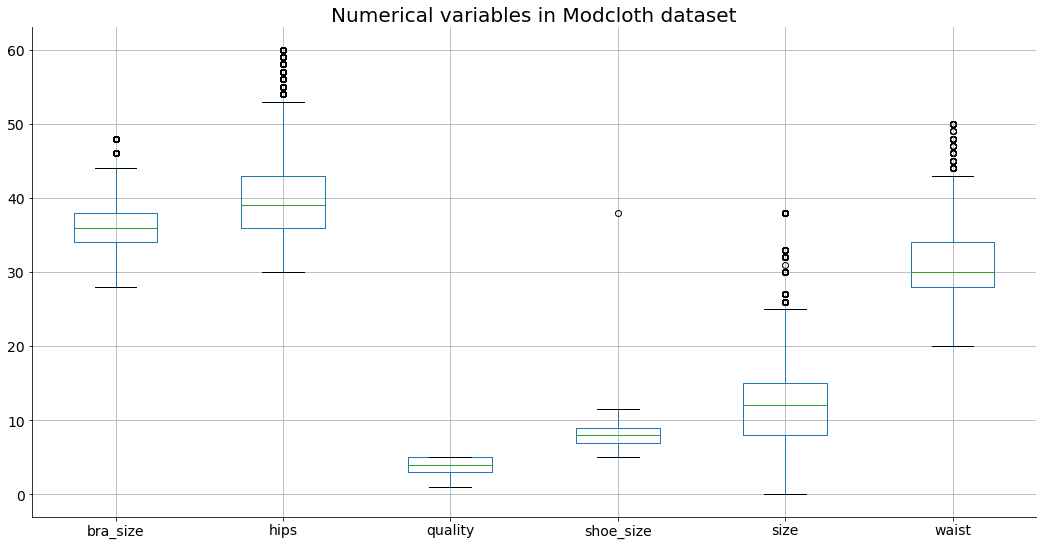

In [ ]:
num_cols = ['bra_size','hips','quality','shoe_size','size','waist']
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

Handling Outliers
* shoe_size: We can clearly see that the single maximum value of shoe size (38) is an outlier and we should ideally remove that row or handle that outlier value. Let's take a look at that entry in our data.
    

In [ ]:
df[df.shoe_size == 38]

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


We can see that the entry seems to be legit, except for the shoe size- it could be wrongly entered by the customer or simple noise. We'll enter this as null value for now.


In [ ]:
df.at[37313,'shoe_size'] = None

**bra_size:** We can take a look at the top 10 bra-sizes (we can see that boxplot shows 2 values as outliers, as per the IQR- Inter-Quartile Range).

In [ ]:
df.sort_values(by=['bra_size'], ascending=False).head(10)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
73118,753429,NaN,38,3.0,dd/e,NaN,48.0,bottoms,NaN,5ft 4in,Mikki,slightly long,large,93792,NaN,NaN,I probably should have or,"I probably should have ordered a size down, bu..."
80713,796383,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,7ft 11in,bandnerd2522,just right,small,810539,11.5,average,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ..."
28901,401773,NaN,38,4.0,dd/e,58.0,48.0,new,NaN,5ft 7in,barretts4jesus,just right,fit,59963,NaN,NaN,Wonderful cardigan. I hav,Wonderful cardigan. I have the honey one as we...
71407,726492,NaN,15,3.0,k,60.0,48.0,bottoms,NaN,7ft 11in,bandnerd2522,slightly short,fit,708288,11.5,average,The pattern is just as lo,"The pattern is just as lovely in person, as in..."
38125,417269,NaN,38,3.0,d,35.0,48.0,new,NaN,5ft 9in,Susan,just right,large,308819,NaN,NaN,I wish I could have gotte,I wish I could have gotten the 3x but it's sti...
57273,645822,NaN,32,5.0,ddd/f,55.0,48.0,tops,NaN,5ft,Lillie,just right,fit,732268,NaN,NaN,I wear this almost every,I wear this almost every single day! Yay! Some...
14033,171125,NaN,38,3.0,c,NaN,48.0,dresses,NaN,5ft 8in,dillsyrpickle,just right,small,416697,NaN,NaN,So I really wanted to lov,So I really wanted to love this dress. I'm a ...
28845,401773,NaN,26,3.0,b,55.0,48.0,new,50,5ft 6in,Michelle,just right,fit,340392,9.5,wide,These cardigans are a gre,These cardigans are a great way to achieve tha...
22637,353933,NaN,38,5.0,b,NaN,48.0,dresses,NaN,5ft 2in,Meghan,slightly long,fit,175295,NaN,NaN,No negatives to this dres,"No negatives to this dress, it's absolutely go..."
38063,417269,NaN,38,4.0,c,NaN,48.0,new,NaN,5ft 6in,Bea,very long,fit,799178,NaN,NaN,"I love the fabric, I love","I love the fabric, I love long tops, this one ..."


Joint Distribution of bra_size vs size

We can visualize the distribution of bra_size vs size (bivariate) to have an understanding about the values.


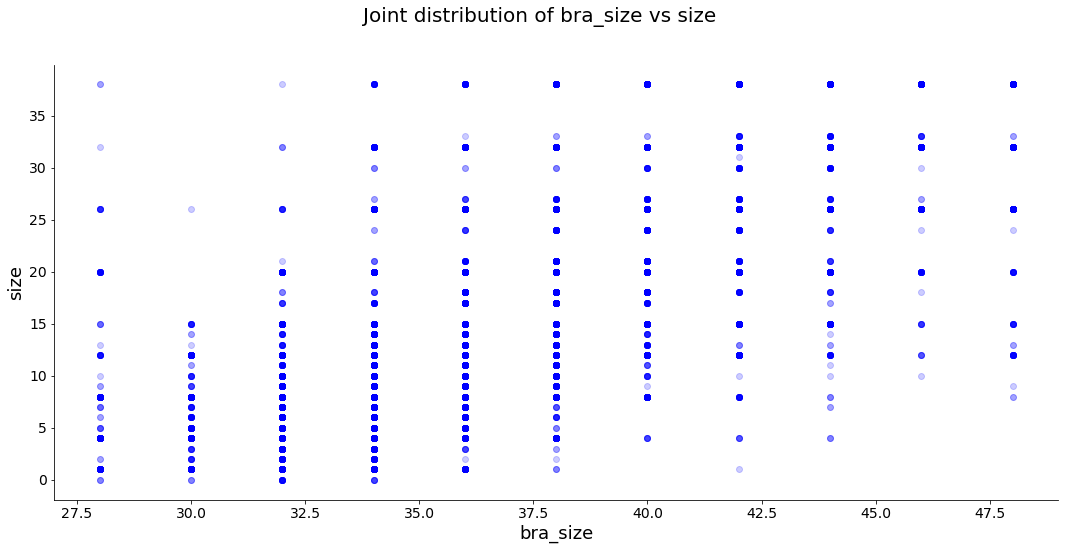

In [ ]:
plt.figure(figsize=(18,8))
plt.xlabel("bra_size", fontsize=18)
plt.ylabel("size", fontsize=18)
plt.suptitle("Joint distribution of bra_size vs size", fontsize= 20)
plt.plot(df.bra_size, df['size'], 'bo', alpha=0.2)
plt.show()


We can't see any significant deviation from usual behavior for bra-size, infact for all other numerical variables as well- we can expect the 'apparent' outliers, from the boxplot, to behave similarly. Now, we 'll head to preprocessing the dataset for suitable visualizations.

**Data Cleaning & Pre-processing**

Let's handle the variables and change the dtype to the appropriate type for each column. We define a function first for creating the distribution plot of different variables. Here, is the initial distribution of features.

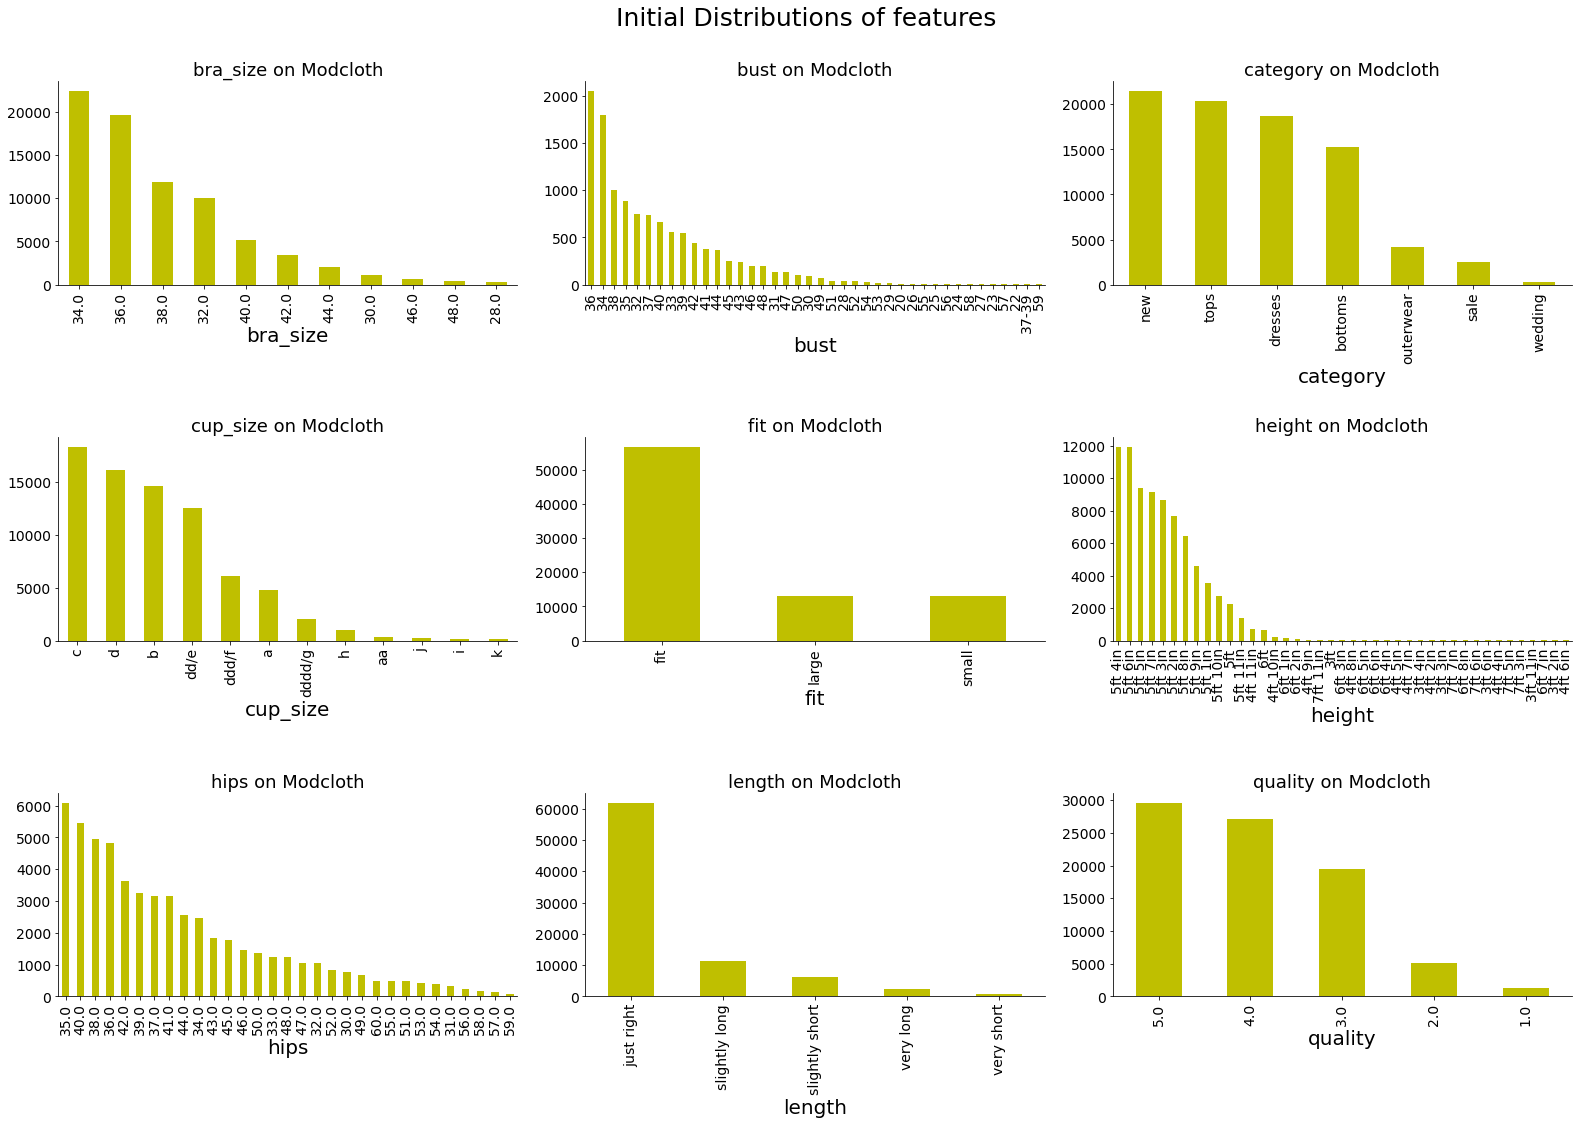

In [ ]:
def plot_dist(col, ax):
    df[col][df[col].notnull()].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Modcloth".format(col), fontsize= 18)
    return ax

f, ax = plt.subplots(3,3, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['bra_size','bust', 'category', 'cup_size', 'fit', 'height', 'hips', 'length', 'quality']
k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize= 25)

**Step-by-step features processing:**

**bra_size:** Although it looks numerical, it only ranges from *28 to 48*, with most of the sizing lying around *34-38*. It makes sense to convert this to categorical dtype. We'll fill the NA values into an 'Unknown' category. We can see above that most of the buyers have a bra-sizing of 34 or 36.

**bust**- We can see by looking at the values which are not null, that bust should be an integer dtype. We also need to handle a special case where bust is given as - *'37-39'*. We'll replace the entry of *'37-39'* with the mean, i.e.- 38, for analysis purposes. Now we can safely convert the dtype to int. However, considering that roughly **86%** of the bust data is missing, eventually it was decided to remove this feature.

**category**- none missing; change to dtype category.

**cup size**- Change the dtype to category for this column. This col has around **7%** missing values. Taking a look at the rows where this value is missing might hint us towards how to handle these missing values.


In [ ]:
df.bra_size = df.bra_size.fillna('Unknown')
df.bra_size = df.bra_size.astype('category').cat.as_ordered()
df.at[37313,'bust'] = '38'
df.bust = df.bust.fillna(0).astype(int)
df.category = df.category.astype('category')

In [ ]:
# df[df.cup_size.isnull()].sample(20)

We can't see anything glaring from the rows where this data is missing, however, as per the curator of the dataset- *"Note that these datasets are highly sparse, with most products and customers having only a single transaction."*

It does point to that maybe these customers have not bought lingerie from modcloth yet and so modcloth does not have that data. So, it makes sense to fill these null values as 'Unknown'. From the prevalence of the values like dd/e, ddd/f, and dddd/g, we can assume these to be legit cup_sizes, also confirmed by this article, where some brands change the cup size dd to e, ddd to f etc. We can directly convert this to category dtype.

**fit**- Change the dtype to category for this column. We can see that a vast majority of customers gave a good 'fit' feedback for the items on Modcloth!

In [ ]:
df.cup_size.fillna('Unknown', inplace=True)
df.cup_size = df.cup_size.astype('category').cat.as_ordered()
df.fit = df.fit.astype('category')

**height**- We need to parse the height column as currently it is a string object, of the form - Xft. Yin. It will make sense to convert height to cms. We also take a look at the rows where the height data is missing.

In [ ]:
def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)

In [ ]:
df.height = df.height.apply(get_cms)

In [ ]:
# df[df.height.isnull()].head(20)

This filtering gives us interesting observations here:

Some customers have given bra_size, cup_size data, whereas all other measurements are empty- possible first-time purchase at Modcloth for lingerie!

Some customers have given shoe_size and all other measurements are empty- possible first-time purchase at Modcloth for shoes! 

It leads us to saying that there are some first-time buyers in the dataset, also talked about by the authors of the data in [1]- about the sparsity of the data due to 1 transactions! Also, as we have no data about the height of these customers, it only makes sense to leave the missing values in the column as it is and possibly remove these rows for future statistical modeling. We have removed the corresponding rows.



# **Feature Engineering**
Creating a new feature of first_time_user
Building on our observations above, it makes sense to identify the transactions which belong to first time users. We use the following logic to identify such transactions:

If bra_size/cup_size have a value and height, hips, shoe_size, shoe_width and waist do not- it is a first time buyer of lingerie.

If shoe_size/shoe_width have a value and bra_size, cup_size, height, hips, and waist do not- it is a first time buyer of shoes.

If hips/waist have a value and bra_size, cup_size, height, shoe_size, and shoe_width do not- it is a first time buyer of a dress/tops.

Below we will verify the above logic, with samples, before we create the new feature.

1. Looking at the few rows where either bra_size or cup_size exists, but no other measurements are available.

2. Looking at the few rows where either shoe_size or shoe_width exists, but no other measurements are available.

3. Looking at the few rows where either hips or waist exists, but no other measurements are available.

In [ ]:
print(df[((df.bra_size != 'Unknown') | (df.cup_size != 'Unknown')) & (df.height.isnull()) & (df.hips.isnull()) &
     (df.shoe_size.isnull()) & (df.shoe_width.isnull()) & (df.waist.isnull())].head(3))
print(df[(df.bra_size == 'Unknown') & (df.cup_size == 'Unknown') & (df.height.isnull()) & (df.hips.isnull()) &
     ((df.shoe_size.notnull()) | (df.shoe_width.notnull())) & (df.waist.isnull())].head(3))
print(df[(df.bra_size == 'Unknown') & (df.cup_size == 'Unknown') & (df.height.isnull()) & ((df.hips.notnull()) | (df.waist.notnull())) &
     (df.shoe_size.isnull()) & (df.shoe_width.isnull())].head(3))


    item_id  waist  size  quality cup_size  hips bra_size category  bust  \
3    123373    NaN    21      5.0     dd/e   NaN  Unknown      new     0   
17   123373    NaN    15      4.0   dddd/g   NaN     36.0      new     0   
43   123373    NaN    15      5.0     dd/e   NaN     36.0      new     0   

    height     user_name      length    fit  user_id  shoe_size shoe_width  \
3      NaN  alexmeyer626  just right    fit   875643        NaN        NaN   
17     NaN         Megan  just right  large   128353        NaN        NaN   
43     NaN       sdhewey  just right    fit   670919        NaN        NaN   

   review_summary review_text  
3             NaN         NaN  
17            NaN         NaN  
43            NaN         NaN  
     item_id  waist  size  quality cup_size  hips bra_size category  bust  \
553   125442    NaN     7      5.0  Unknown   NaN  Unknown      new     0   
591   125442    NaN     7      3.0  Unknown   NaN  Unknown      new     0   
665   125442    NaN    

# EDA via visualizations

1. Distribution of different features over Modcloth dataset

2. Categories vs. Fit/Length/Quality
Here, we will visualize how the items of different categories fared in terms of - fit, length, and quality. This will tell Modcloth which categories need more attention!



I have plotted 2 distributions in categories here:

1. Unnormalized- viewing the frequency counts directly- for comparison across categories. We also include the best fit, length, or quality measure in this plot.

2. Normalized - viewing the distribution for the category after normalizing the counts, amongst the category itself- it will help us compare what are major reason for return amongst the category itself. We exclude the best sizing & quality measures, so as to focus on the pre-dominant reasons of return per category (if any).


In [ ]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  Modcloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)
    
def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm

In [ ]:
df.category.value_counts()

new          21488
tops         20364
dresses      18650
bottoms      15266
outerwear     4223
sale          2524
wedding        275
Name: category, dtype: int64

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


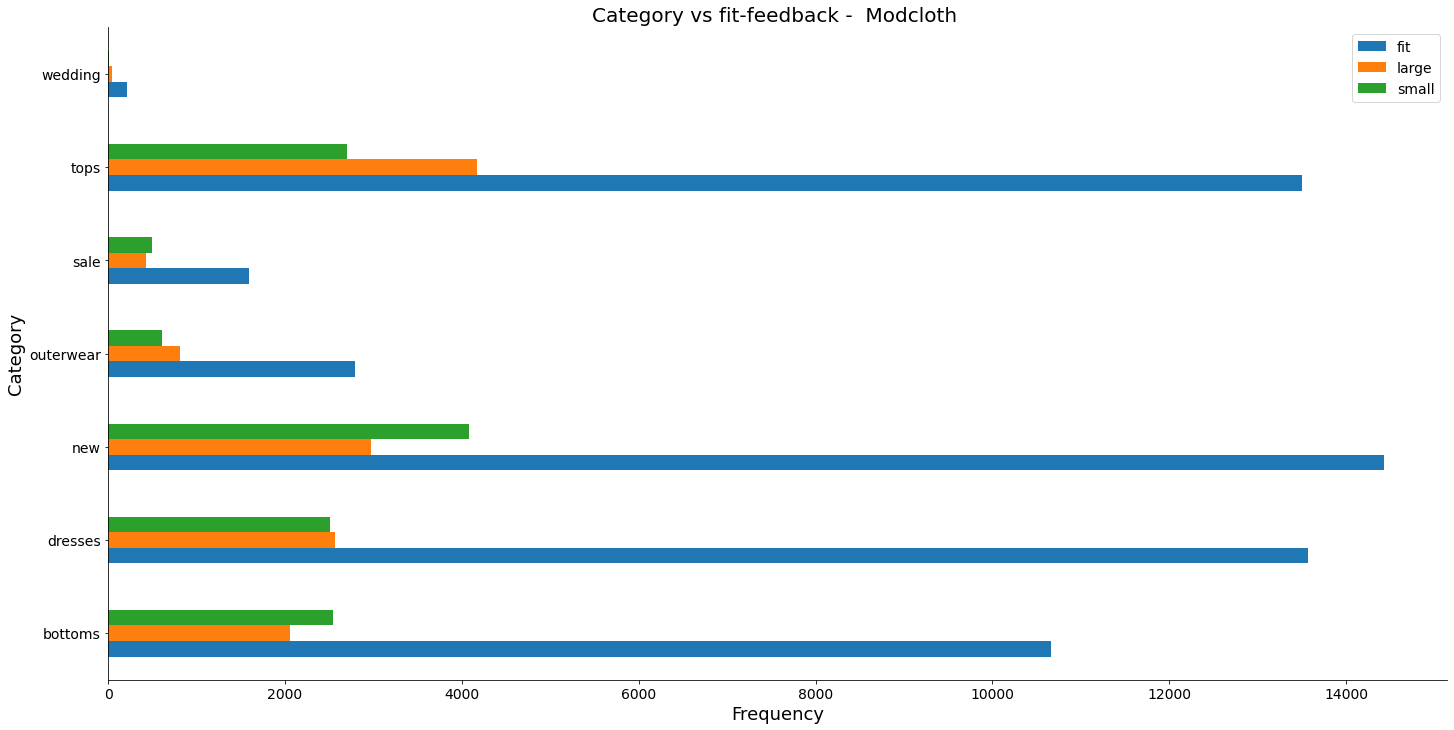

In [ ]:
g_by_category = df.groupby('category')
cat_fit = g_by_category['fit'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
cat_fit_norm.drop(['fit'], axis=1, inplace=True)
plot_barh(cat_fit, 'fit')

Observations:

Best-fit response (fit) has been highest for new, dresses, and tops categories.
Overall maximum bad fit-feedback has belonged mostly to 2 categories- new and tops! Dresses and bottoms categories follow.
Weddings, outerwear, and sale are not prominent in our visualization- mostly due to the lack of transactions in these categories.

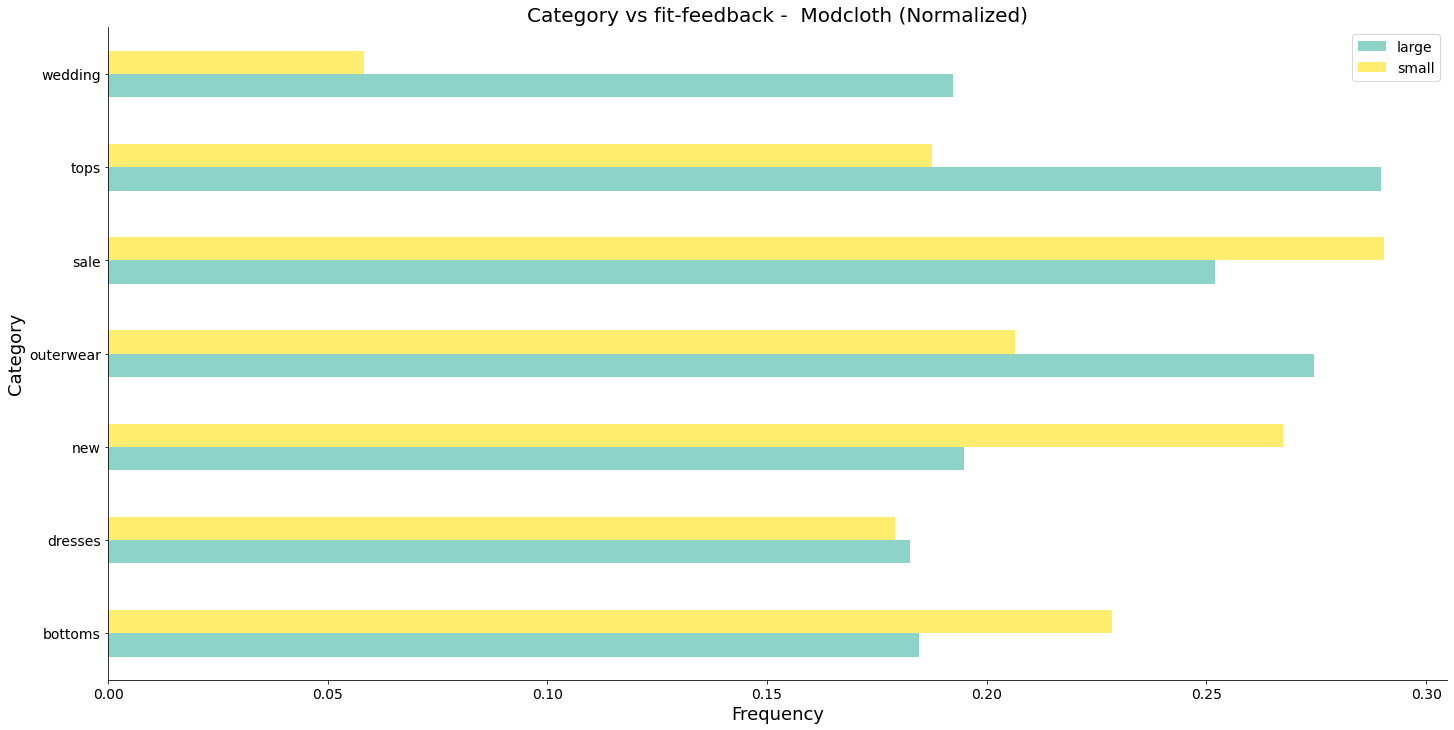

In [ ]:
plot_barh(cat_fit_norm, 'fit', norm=1, cmap='Set3')

Here, we can see that amongst the categories themselves:

Wedding, tops, & outerwear categories usually have more returns due to large sizing.
New, sale, & bottoms usually have frequent returns due to small sized buys.
Dresses has similar return reasons, in terms of fit.

**Category vs Length**

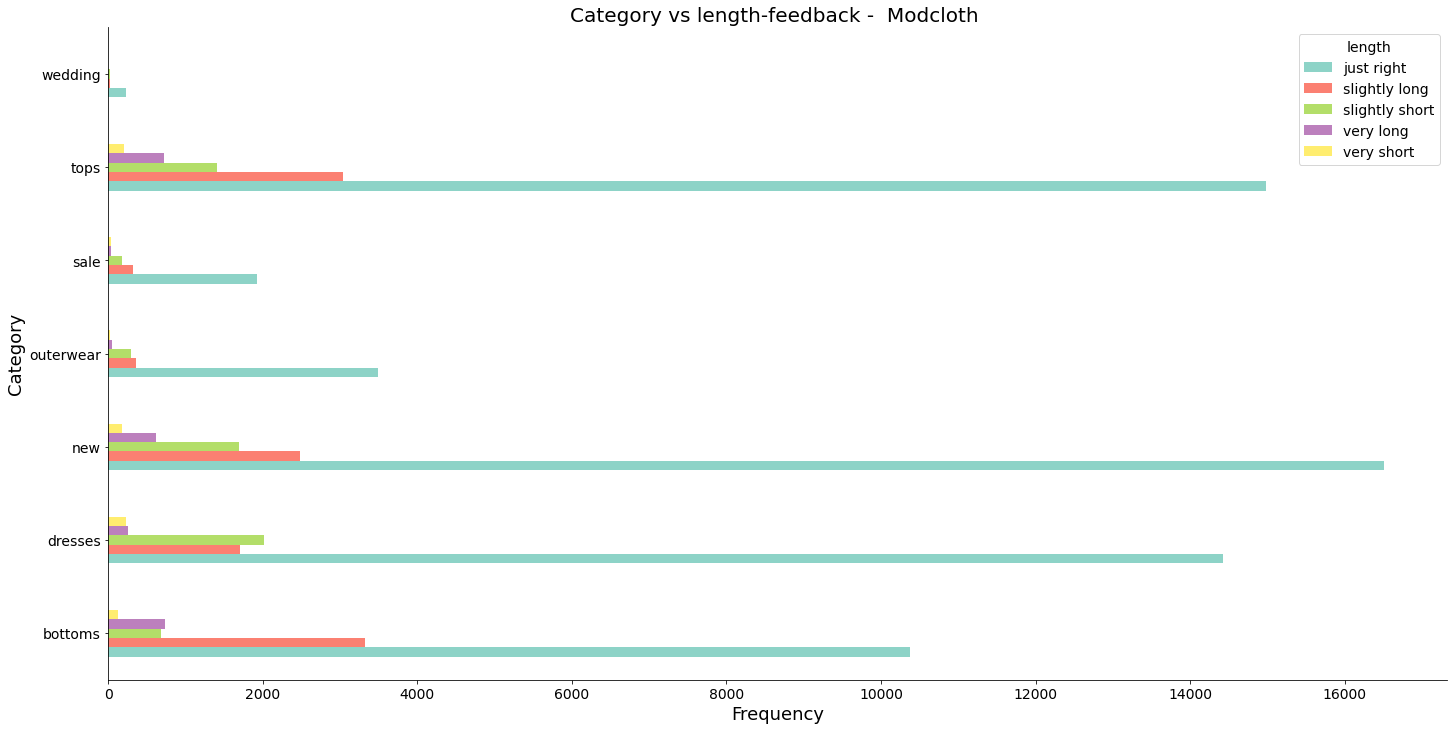

In [ ]:
cat_len = g_by_category['length'].value_counts()
cat_len = cat_len.unstack()
plot_barh(cat_len, 'length', 'Set3')

Best length-fitting ('just right') belongs to tops, new, dresses and bottoms! (Also due to predominance of these categories in our total transactions- they make up almost 92% of our transactions!)
All transactions share a similar order of reasons for return (in the order of importance), which is kind of intuitive as well:
1. slightly long
2. slightly short
3. very long
4. very short

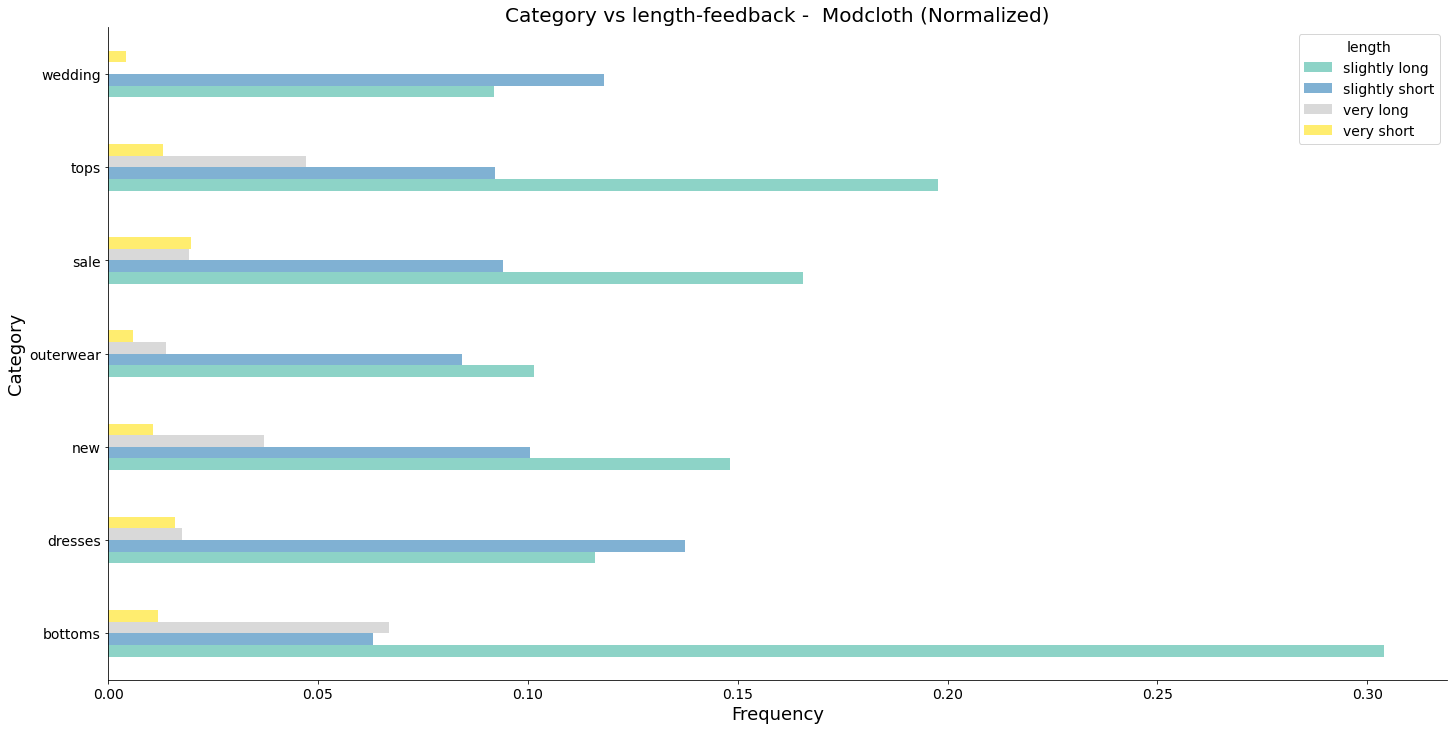

In [ ]:
cat_len_norm = norm_counts(cat_len)
cat_len_norm.drop(['just right'], axis = 1, inplace=True)
plot_barh(cat_len_norm, 'length', cmap='Set3', norm=1)

The normalized plot, focusing on the problems allows us to dig deeper into length-wise reasons of return per category:

Customers tend to make 'slightly long' purchases in bottoms, new, sale, & tops categories.
'slightly short' returns take place mostly in dresses and wedding categories.

**Category vs Quality**

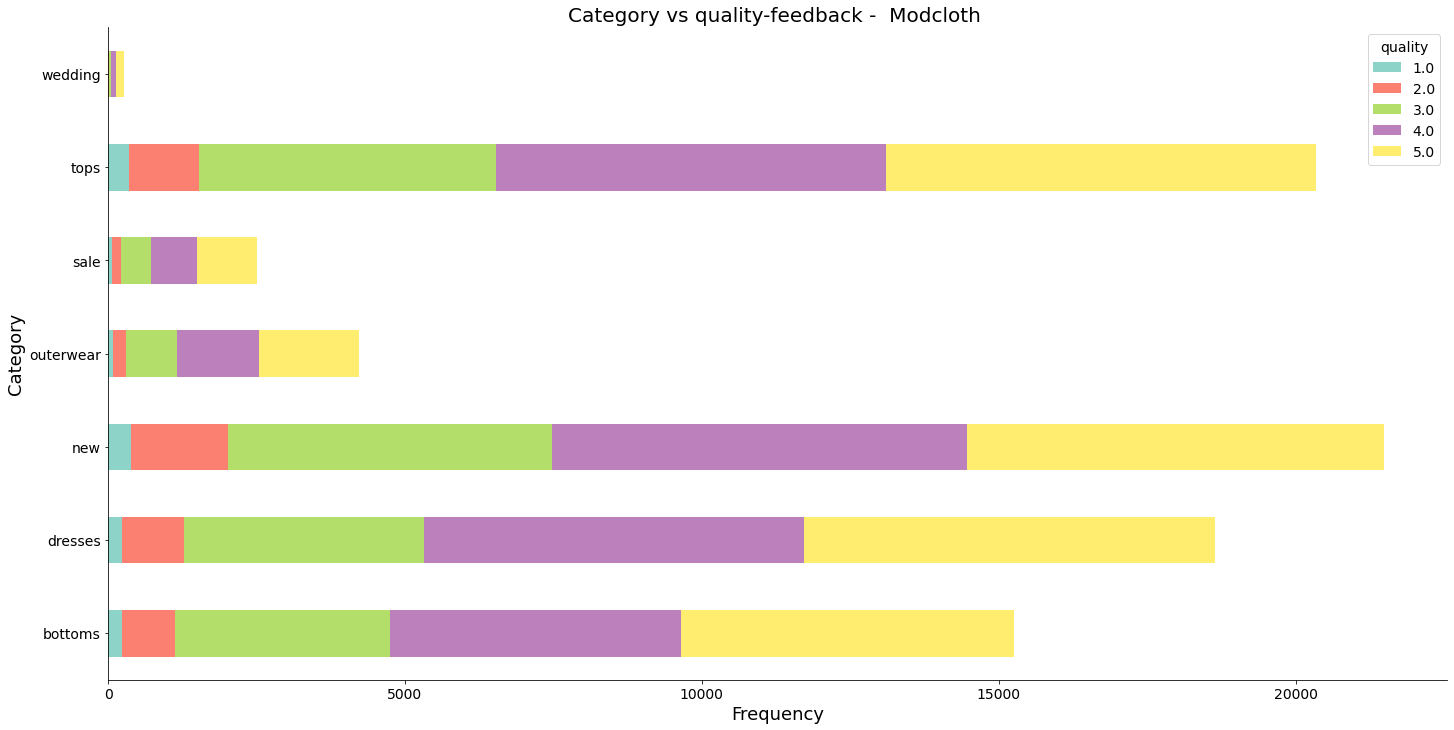

In [ ]:
cat_quality = g_by_category['quality'].value_counts()
cat_quality = cat_quality.unstack()
plot_barh(cat_quality, 'quality', 'Set3', stacked=1)

Almost the same share of people have rated the categories of tops, new, dresses, & bottoms as 5, 4, & 3.
All the trends in terms of share of ratings seems to be constant across categories.

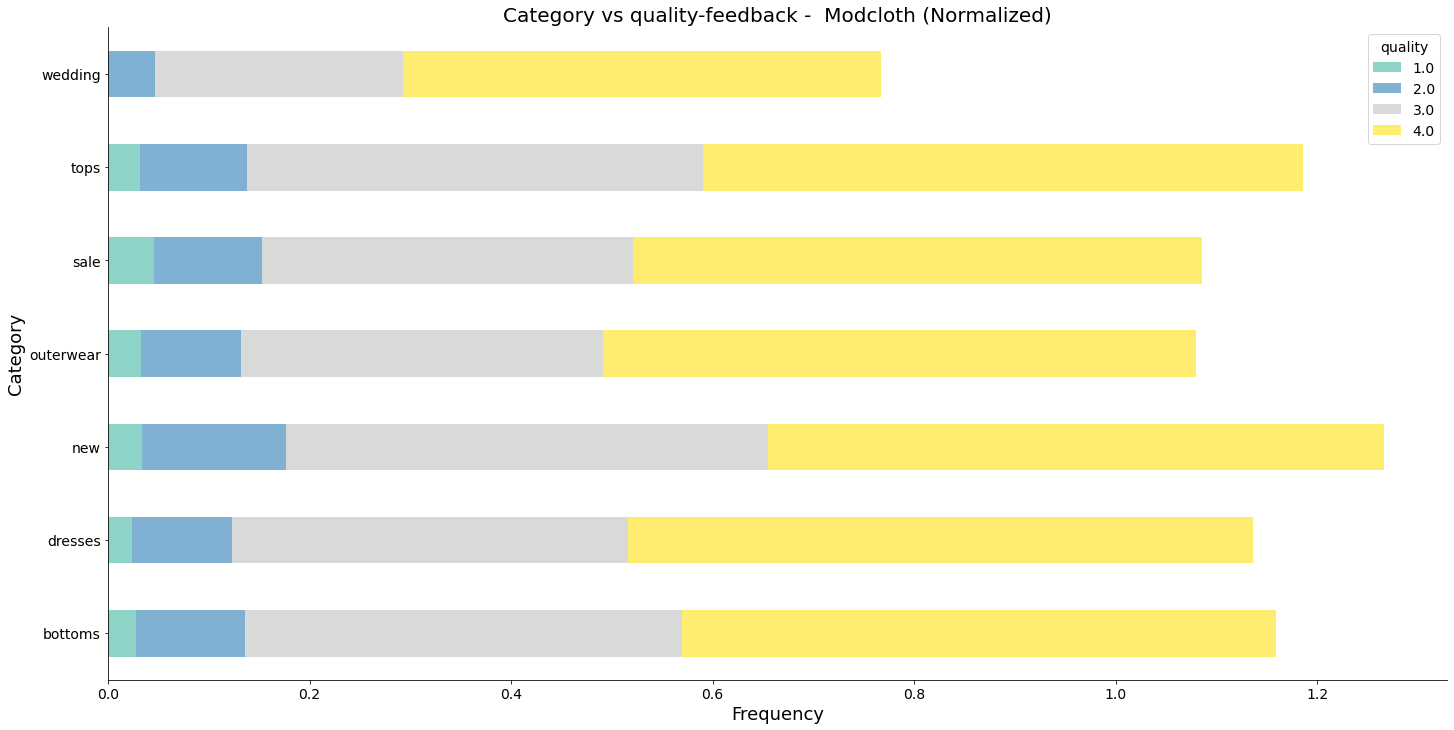

In [ ]:
cat_quality_norm = norm_counts(cat_quality)
cat_quality_norm.drop([5.0], axis = 1, inplace=True)
plot_barh(cat_quality_norm, 'quality', 'Set3', stacked=1, norm=1)

Here also we can assert our previous observation that all the categories share similar share of ratings.
To nitpick- new , sale & tops seem to have a higher share than normal of bad ratings (1.0 & 2.0) in terms of quality.



2. Total Number of Users vs Total Number of items bought
Visualizing the total number of users who bought x number of items, where we affirm the author's [1] statement that the data is very sparse with a major chunk (38.45%) of the users who bought only 1 item from the website during the time this data was collected.

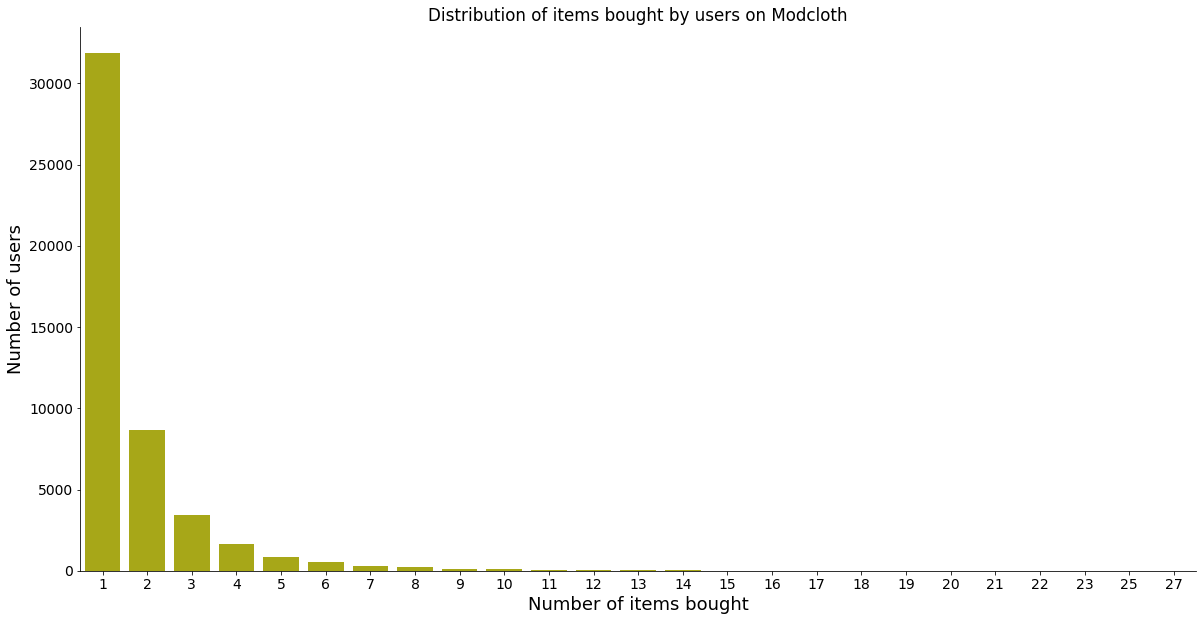

In [ ]:
# Users who bought so many items
items_bought = []
total_users = []
for i in range(min(df.user_id.value_counts()), max(df.user_id.value_counts())+1):
    all_users = sum(df.user_id.value_counts() == i)
    if all_users != 0:
        total_users.append(all_users)
        items_bought.append(i)
plt.xlabel("Number of items bought", fontsize = 18)
plt.ylabel("Number of users", fontsize = 18)
plt.title("Distribution of items bought by users on Modcloth")
__ = sns.barplot(x=items_bought, y=total_users, color='y')
fig = plt.gcf()
fig.set_size_inches(20,10)


A major chunk of the users (~40%) have only bought 1 item from Modcloth during the time this data was collected. Although we found only 903 out of those were first time users (no previous data existed of these customers). This explains and reaffirms the dataset curator's statement about sparsity of the data.
Most users bought 1, 2, or 3 products from Modcloth out of the ~80,000 transactions in this dataset.

3. Height vs shoe_size - Modcloth customers¶
It would be interesting to see if there exists a linear relation between the height of a person and their shoe-size, i.e.- it will mean shoe-size increases with increase in height!

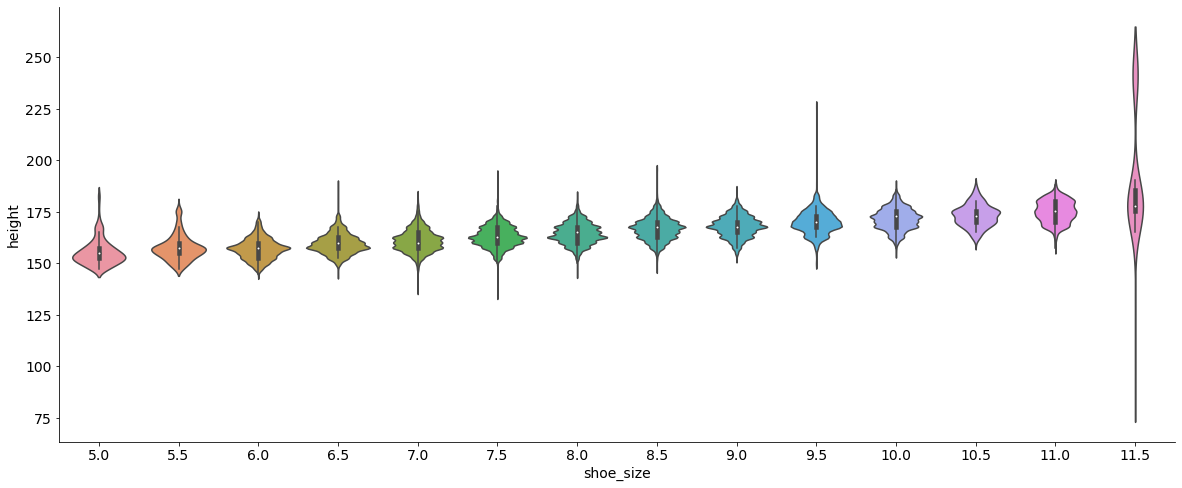

In [ ]:
ig = plt.gcf()
fig.set_size_inches(20,10)
__ = sns.violinplot(x='shoe_size', y='height',data=df, size = 20)

We can see here a "linear correlation between foot size and height". This observation was also seen

Assumptions:
The data source has been assumed as following on the Modcloth dataset:

* item_id- from item.
* waist- from user input.
* size - from item.
* quality- from user input.
* cup size- from user input.
* hips- from user input.
* bra size- from user input.
* category- from item.
* bust- from user input.
* height- from user input
* user_name- from user input
* length - from user input
* fit- from user input
* user_id- from user.

